In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diwali-sales-python-analysis/Diwali Sales Data.csv


## Goals & KPIs

•	To understand the customers’ demographics (gender, age groups, marital status, occupation)

•	To understand which are the top performing states.

•	To analyse the performance of different product categories.

•	To find out the top purchasing customers.



**Questions solved in this analysis:**

•	To find out the total no. of male and female customers and who has generated the maximum buying capacity.

•	To analyse the different age groups of customers.

•	To find out the top 10 states on the basis of the most no. of orders placed and generated the maximum sales.

•	To analyse the marital status of the customers, maximum orders placed by which category of people and the sales generated by them.

•	Which category of professionals exhibit the maximum purchasing capacity and the sales generated by them?

•	Which are the top selling product categories and the sales generated by them?

•	 Who are the top performing Customers (User_ID)?

## Importing libraries and downloading file.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("/kaggle/input/diwali-sales-python-analysis/Diwali Sales Data.csv", encoding = 'unicode_escape')   
# unicode_escape helps to parse the error while downloading file.

In [5]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,Yes,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,No,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,No,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,Yes,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,No,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,No,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,Yes,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,Yes,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,Yes,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,Yes,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,No,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,No,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,Yes,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,No,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  object 
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.3+ MB


## Data Cleaning

In [9]:
# deleting last 2 columns 
df.drop(['Status','unnamed1'], axis=1, inplace = True)

In [10]:
# Checking null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

**We can either drop those 12 null values or replace those null values with the mean of that column. Here, we will be dropping the null values.**

In [11]:
df.dropna(inplace = True)

In [12]:
df.shape    # checking whether those 12 null values have been deleted or not.

(11239, 13)

In [13]:
# changing datatype of Amount column from float to int

df['Amount']= df['Amount'].astype('int')

In [14]:
# checking whether the datatype has changed or not.
df['Amount'].dtype

dtype('int64')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
df.describe()

,User_ID,Age,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,2.489634,9453.610553
std,1.716039e+03,12.753866,1.114967,5222.355168
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,4.000000,23952.000000


In [17]:
# using describe() function for specific columns

df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [19]:
import os

# Set working directory to Kaggle working directory
os.chdir('/kaggle/working')

### Gender

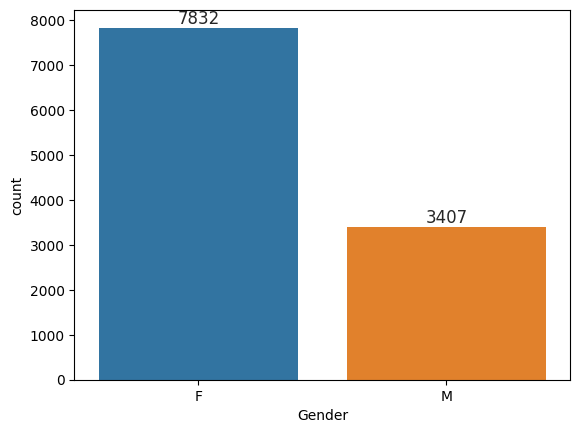

In [20]:
ax = sns.countplot (x='Gender', data = df)     # count the total no. males and females.
sns.set(rc={'figure.figsize':(4,5)})
for bars in ax.containers:                    # to show the count of respective gender.
    ax.bar_label(bars)
plt.savefig('gender_count.png')

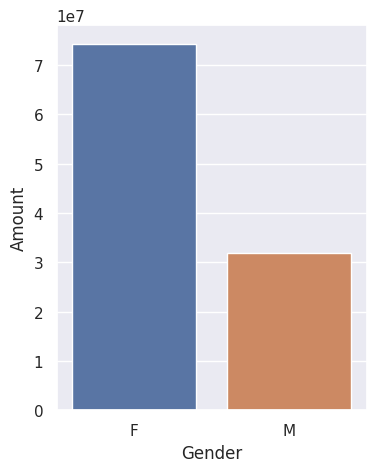

In [21]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x='Gender', y = 'Amount', data = sales_gen)
sns.set(rc={'figure.figsize':(4,4)})
plt.savefig('gender_amount_spent.png')

***From the above two graphs we can say that the maximum no. of buyers are females and they have also generated the maximum revenue.***

### Age group

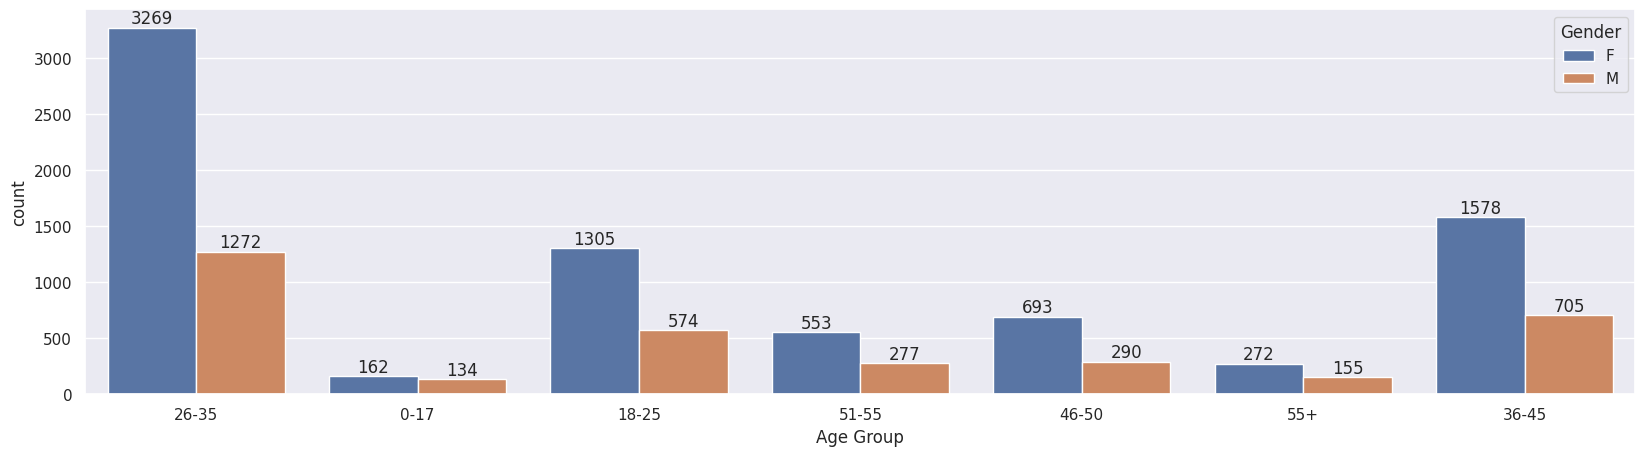

In [36]:
ax = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')         # total count of males and females in differnet age groups.
sns.set(rc={'figure.figsize':(25,6)})
for bars in ax.containers:                                            # to show the count of gender in different age groups.
    ax.bar_label(bars)
plt.savefig('age_group_bygender.png')

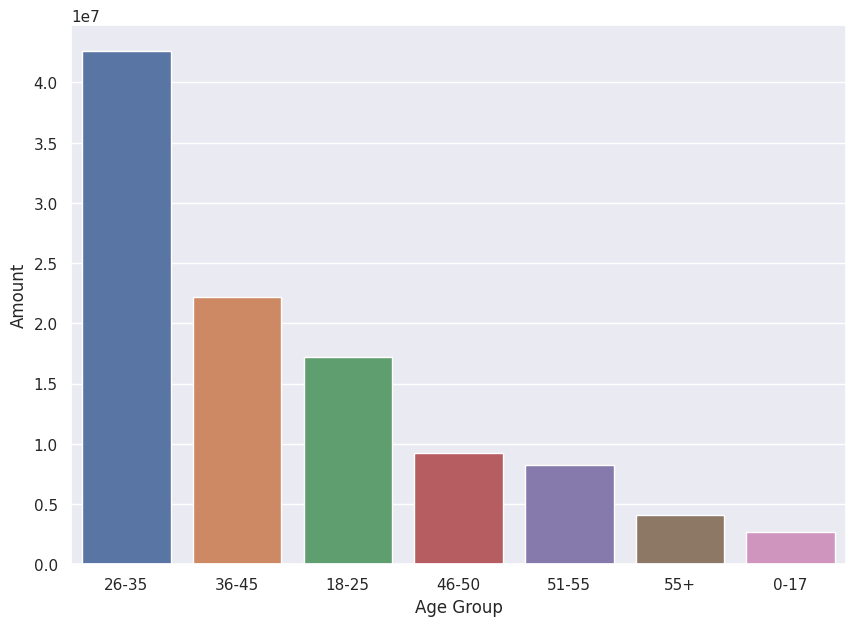

In [39]:
# spending power in different age groups.

sales_age = df.groupby('Age Group', as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending =  False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)
sns.set(rc={'figure.figsize':(10,7)})

plt.savefig('age_group_amount.png')

***The maximum buyers are in the age group of 26-35 years of age, mostly being females.***

### Top 10 States by Orders

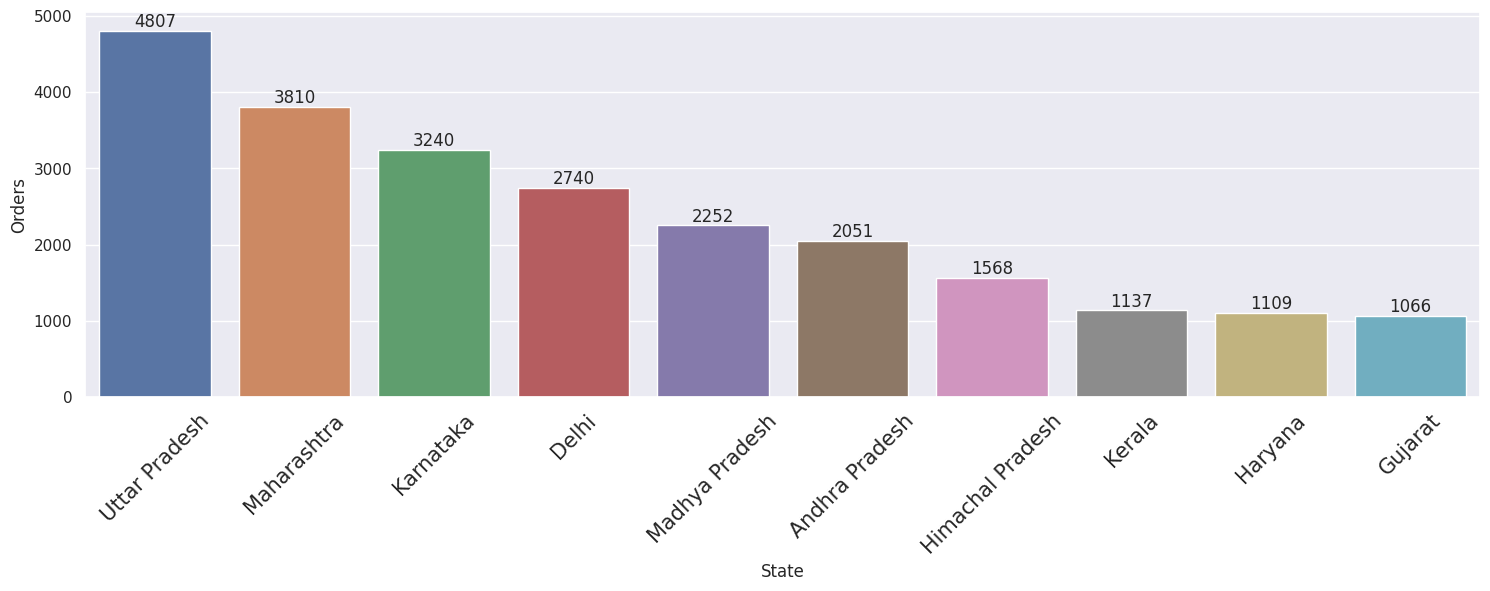

<Figure size 1000x700 with 0 Axes>

In [40]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending =  False).head(10)  #head(10) gives top 10 states


# Set figure size
plt.figure(figsize=(18, 5))

# Plot the total orders placed in different states
ax = sns.barplot(x='State', y='Orders', data=sales_state)

# Label the bars with the count of orders
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=15)
plt.show()
plt.savefig('sales_state.png')

### Top 10 states by Sales

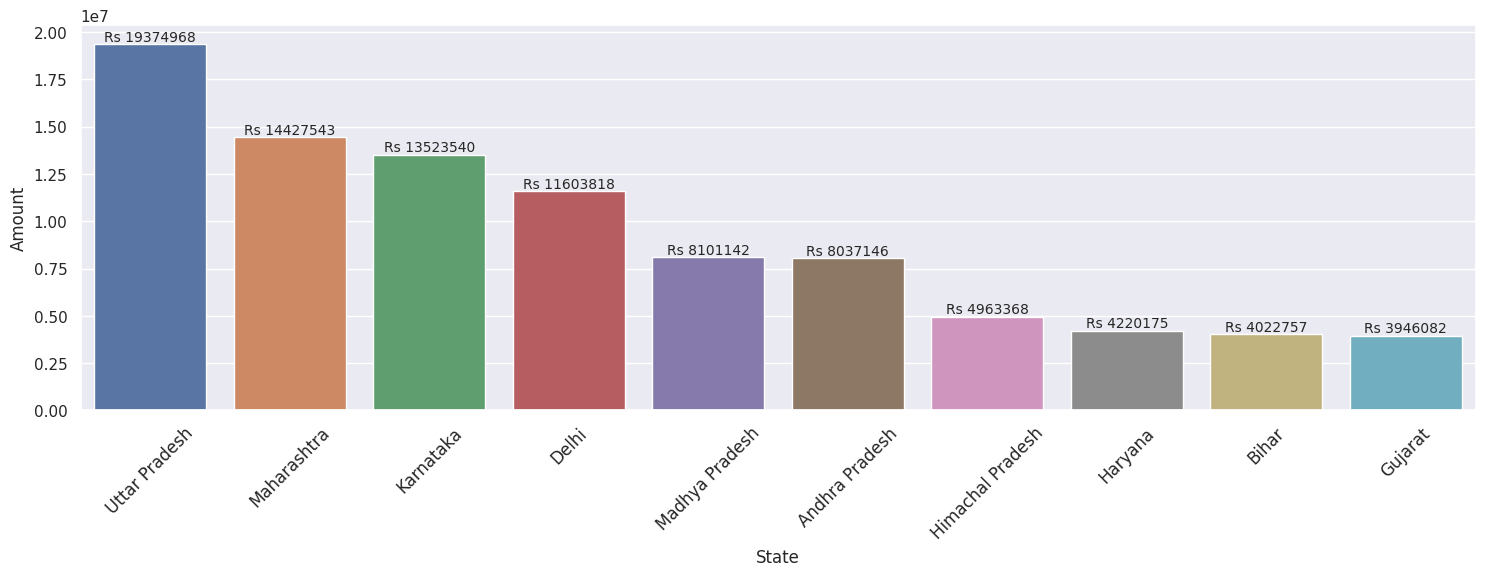

<Figure size 2000x600 with 0 Axes>

In [58]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Set figure size
plt.figure(figsize=(18, 5))

# Plot the total amount spent in different states
ax = sns.barplot(x='State', y='Amount', data=sales_state)

# Label the bars with the amount spent and format y-axis tick labels as thousands (K)
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', fmt='Rs %.0f', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

plt.show()
plt.savefig('sales_state_amount.png')

***From the above two graphs we can say that most of the orders and sales have been made from Uttar Pradesh, Maharashtra and Karnataka.***

### Marital Status

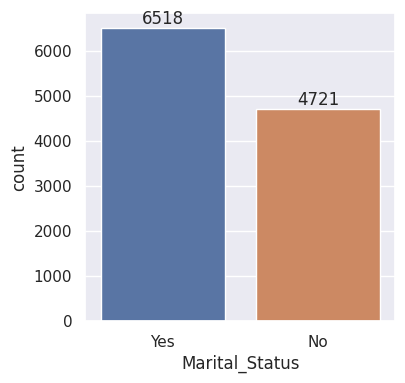

In [43]:
ax = sns.countplot (x='Marital_Status', data = df)     # count the total no. married and unmarried individuals.
sns.set(rc={'figure.figsize':(5,4)})
for bars in ax.containers:                    # to show the count of respective marital status.
    ax.bar_label(bars)
plt.savefig('marital_status_count.png')

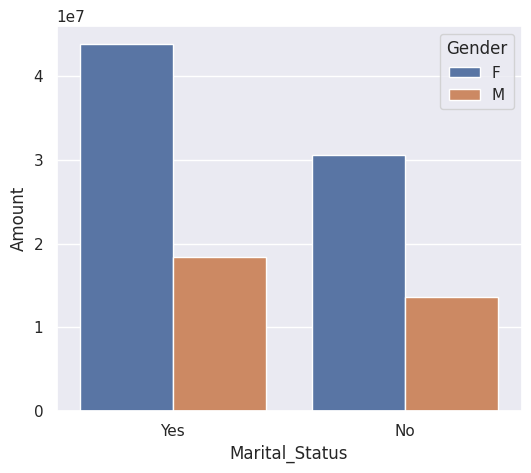

In [27]:
sales_married_status = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=sales_married_status, x='Marital_Status', y='Amount', hue='Gender')
plt.savefig('marital_status_bygender.png')

***From the above two graphs we can see that most of the buyers are married women and they have the high purchasing power.***

### Occupation

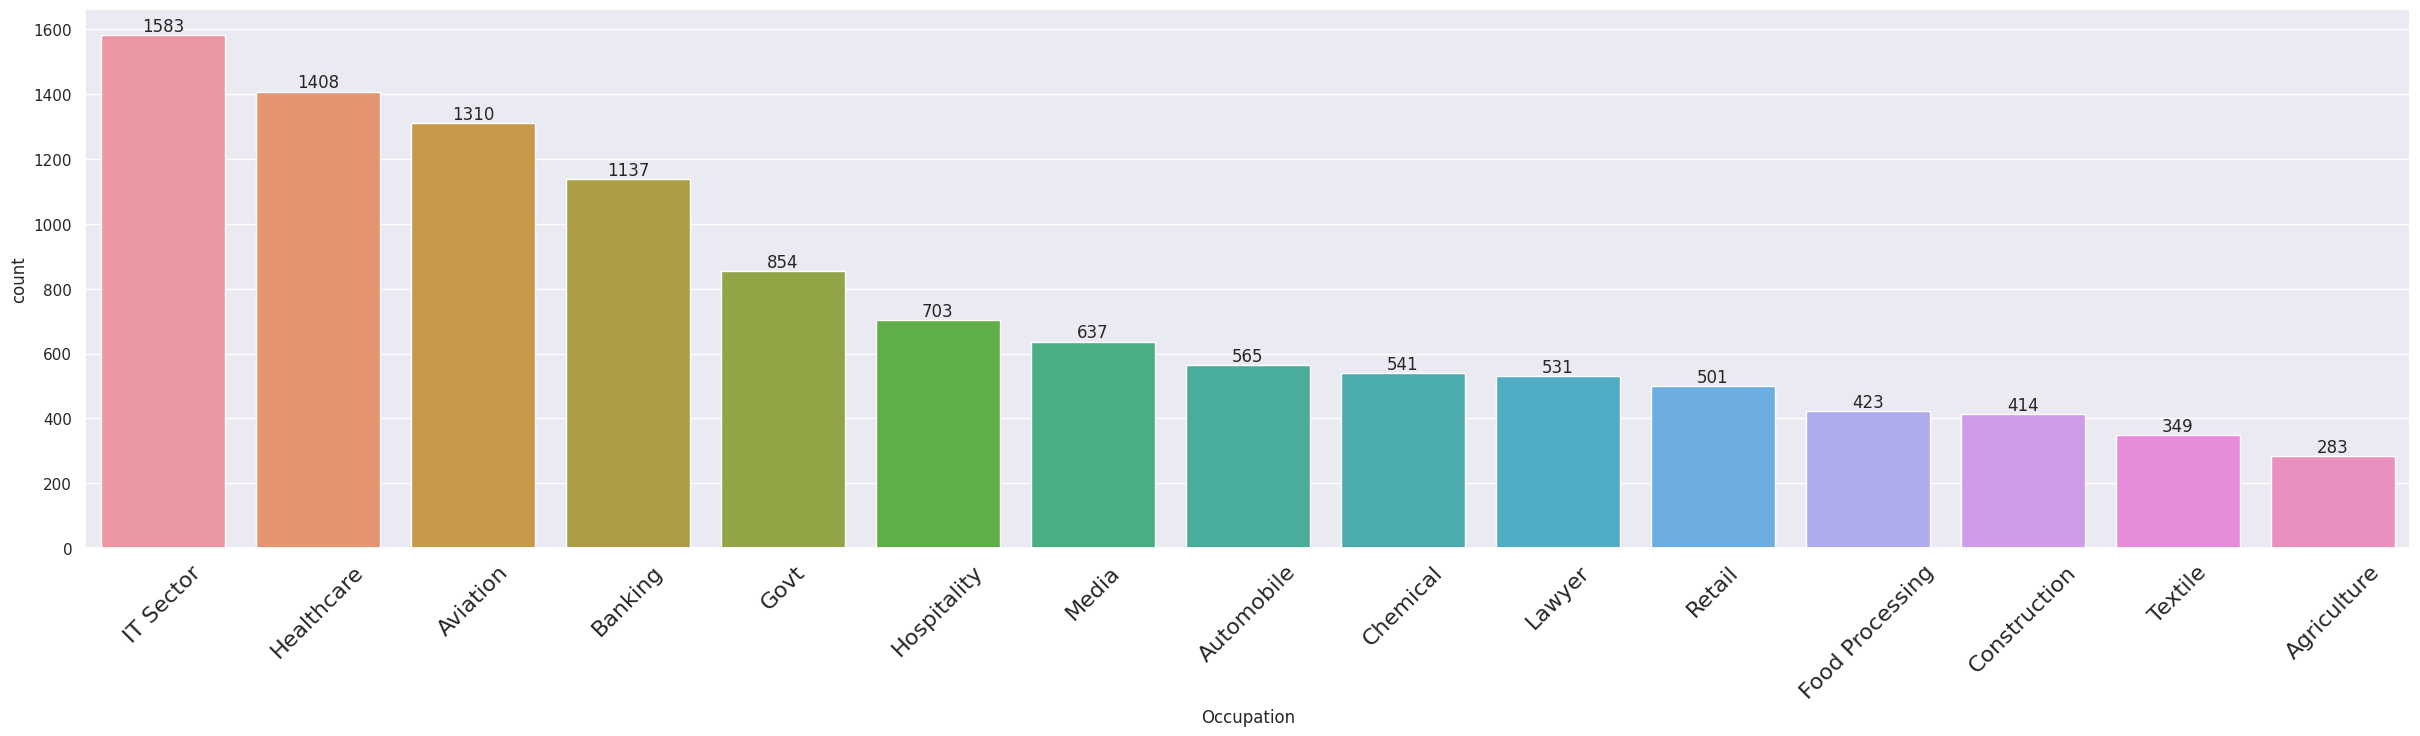

In [47]:
ax = sns.countplot(x='Occupation', data = df, order=df['Occupation'].value_counts().index)
sns.set(rc={'figure.figsize':(30,7)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=16)
for bars in ax.containers:
    ax.bar_label(bars)
plt.savefig('occupation.png')

***From the above analysis we can see that people from IT Sector, Healthcare and Aviation are spending the most.***

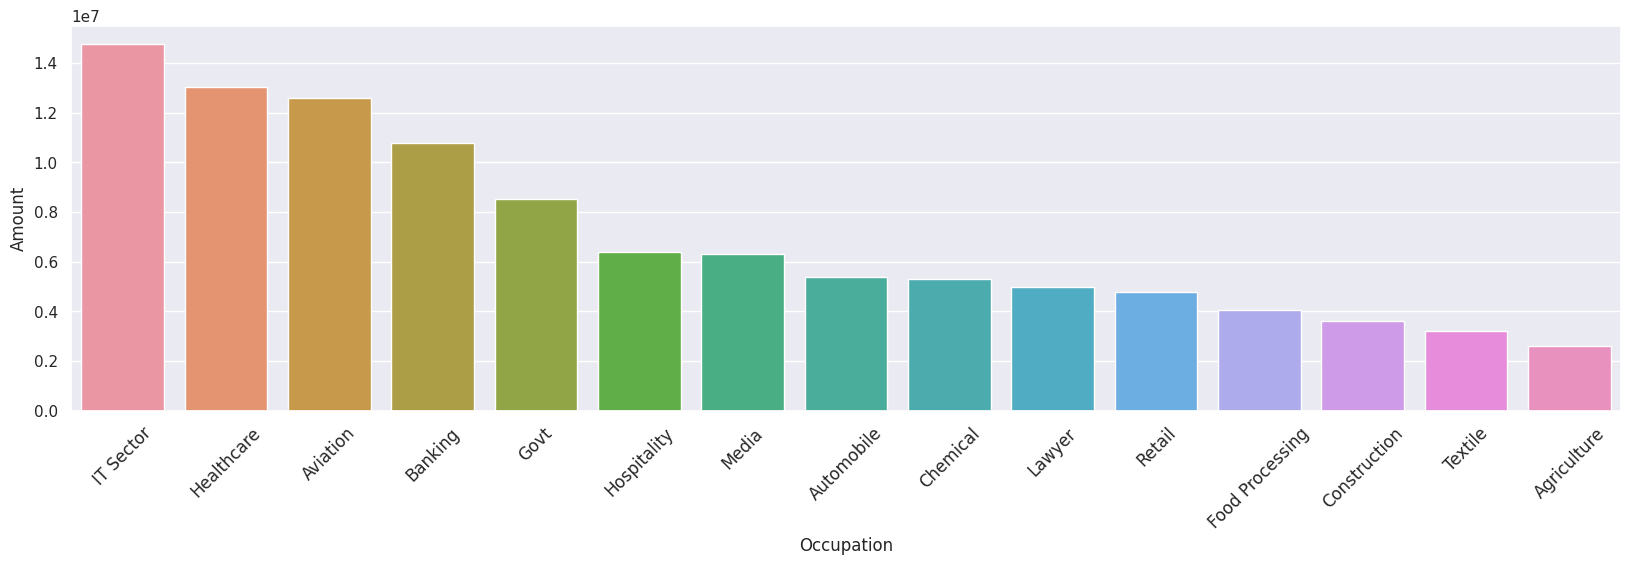

<Figure size 2000x500 with 0 Axes>

In [29]:
sales_occupation = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(data=sales_occupation, x='Occupation', y='Amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

plt.show()
plt.savefig('occupation_amount.png')

***From above graphs we can say that professionals from the IT sector, Healthcare and Aviation are spending the most.***

### Product Category

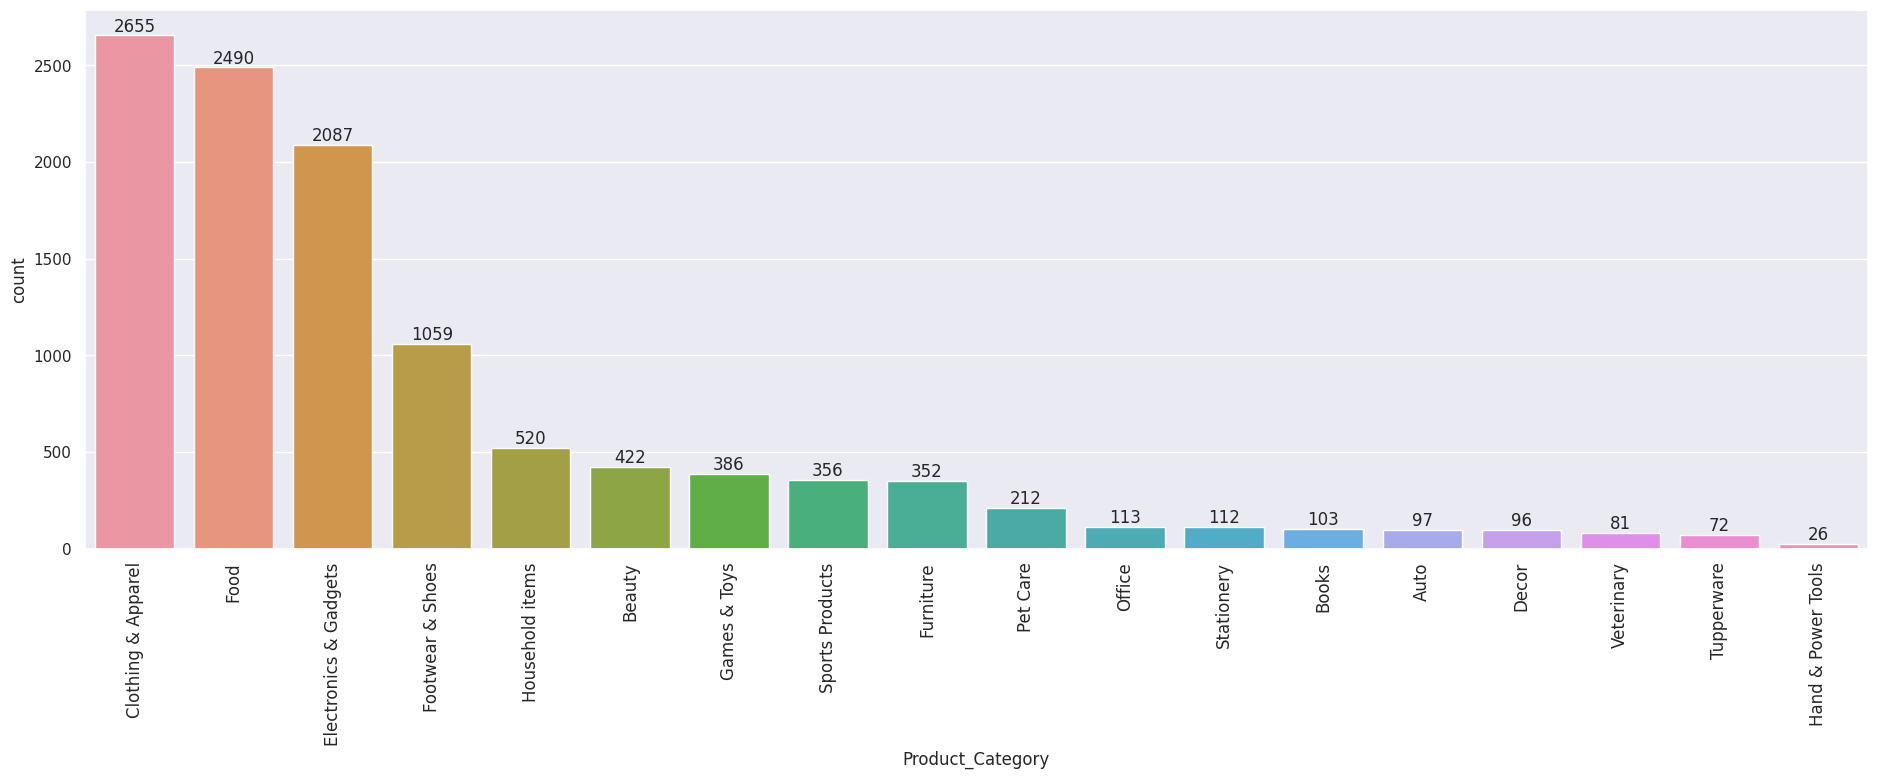

In [53]:
sorted_categories = df['Product_Category'].value_counts().index.tolist()
ax = sns.countplot(x= 'Product_Category', data = df, order=sorted_categories)

sns.set(rc={'figure.figsize':(23,7)})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
for bars in ax.containers:
    ax.bar_label(bars)

plt.show
plt.savefig('product_categories_count.png')

***We can see here that maximum expenditure has been made on Clothing, Food and Electronic gadgets.***

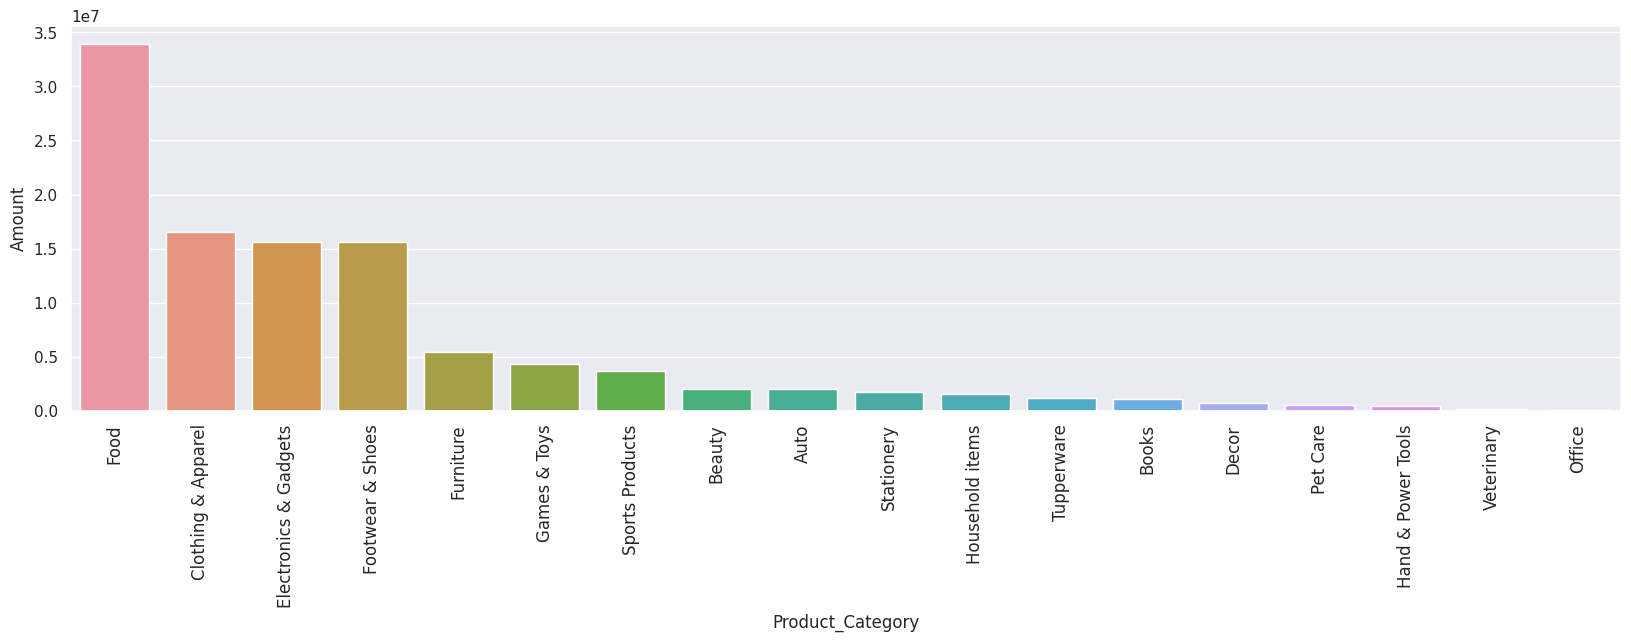

<Figure size 2000x500 with 0 Axes>

In [54]:
sales_products = df.groupby(['Product_Category'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending= False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category', y='Amount', data = sales_products)

ax = sns.barplot(x='Product_Category', y='Amount', data=sales_products)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)

plt.show()
plt.savefig('product_categories_amount.png')

***By analysing Product by Order data we found that Clothing, Food and Electronic Gadgets are the top categories where maximum no. of orders are placed.***

***By analysing Product by Amount data we found that Food, Clothing and Electronic Gadgets are the top categories where maximum no. of revenue are generated.***

### Product ID

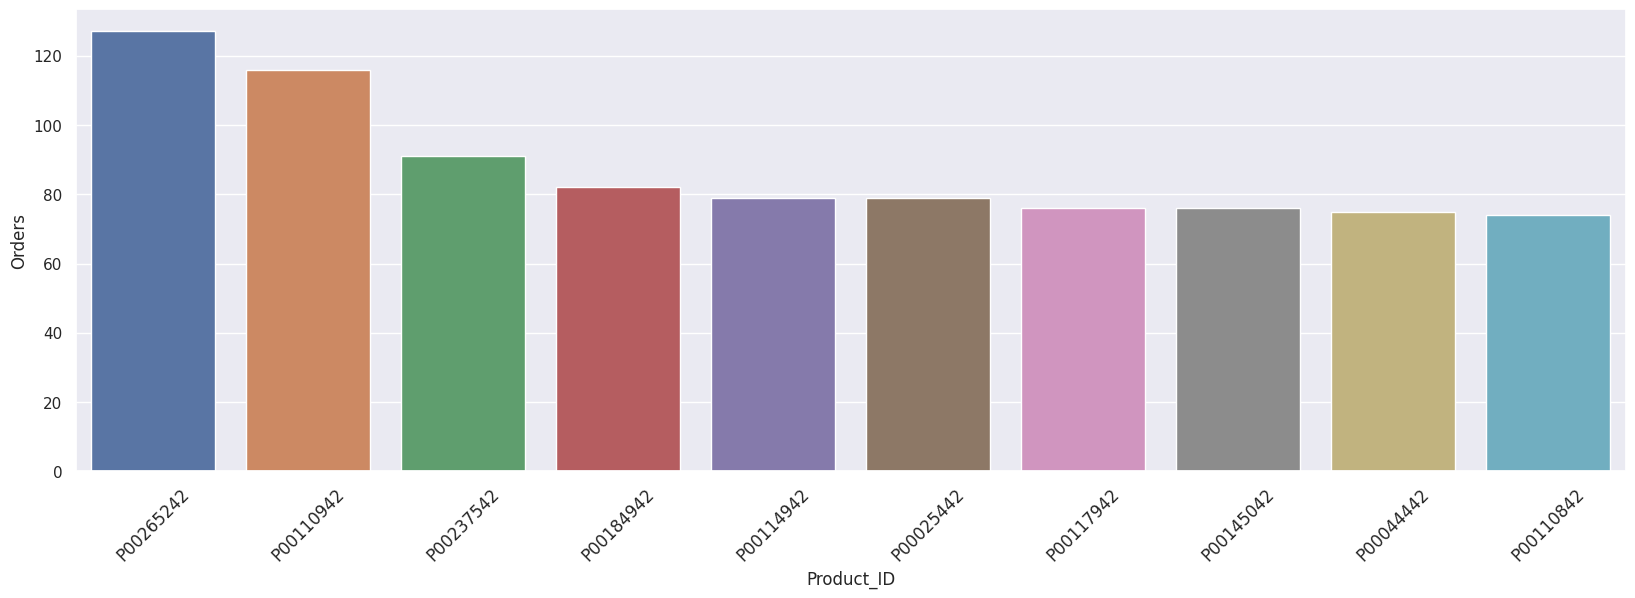

<Figure size 2000x600 with 0 Axes>

In [55]:
sales_product_id = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,6)})

ax = sns.barplot(x='Product_ID', y='Orders', data=sales_product_id)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

plt.show()
plt.savefig('product_ID_orders.png')

<Axes: xlabel='Product_ID'>

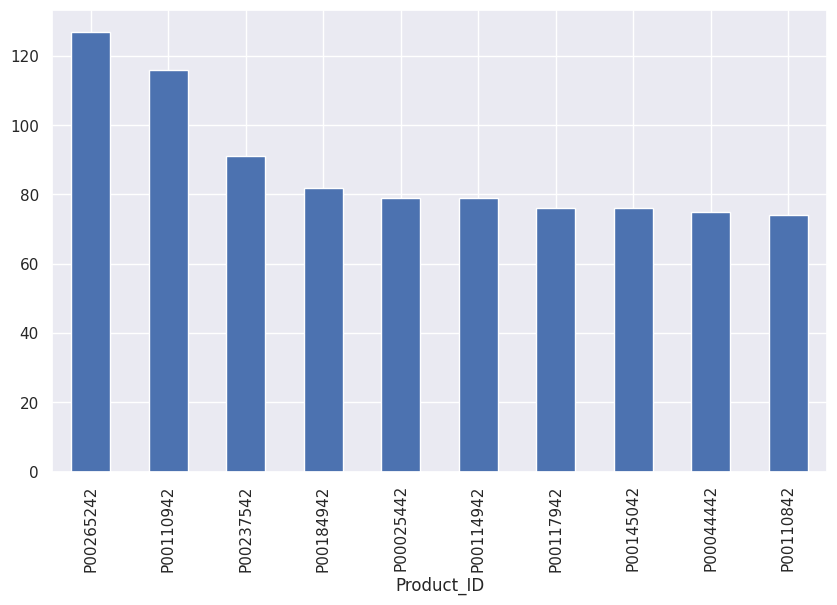

In [57]:
# alternative way to present the above graph

fig1,ax1 = plt.subplots(figsize=(10,6))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

***The top 3 product_ID are: P00265242, P00110942, P00237542.***

### Top 10 Customers on the basis of no. of Orders and Sales

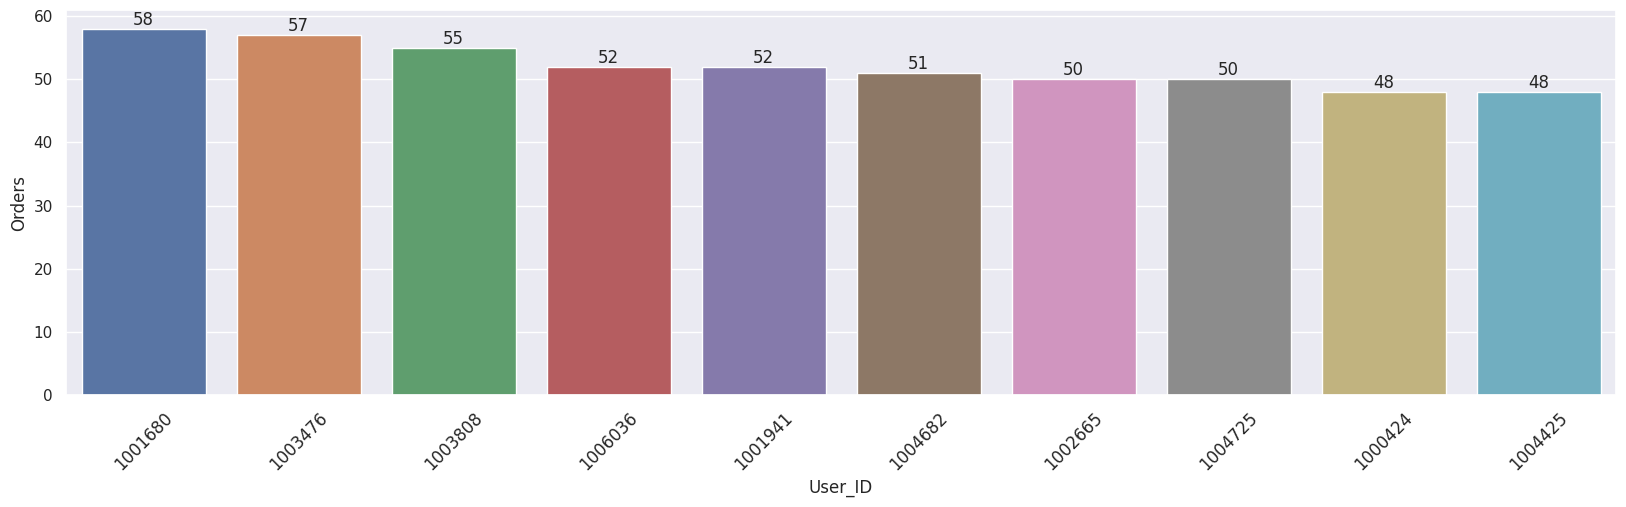

<Figure size 2000x500 with 0 Axes>

In [34]:
top_customers_orders = df.groupby(['User_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})

ax = sns.barplot(x='User_ID', y='Orders', data=top_customers_orders, order=top_customers_orders['User_ID'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show() 
plt.savefig('top_customersID_byorder.png')

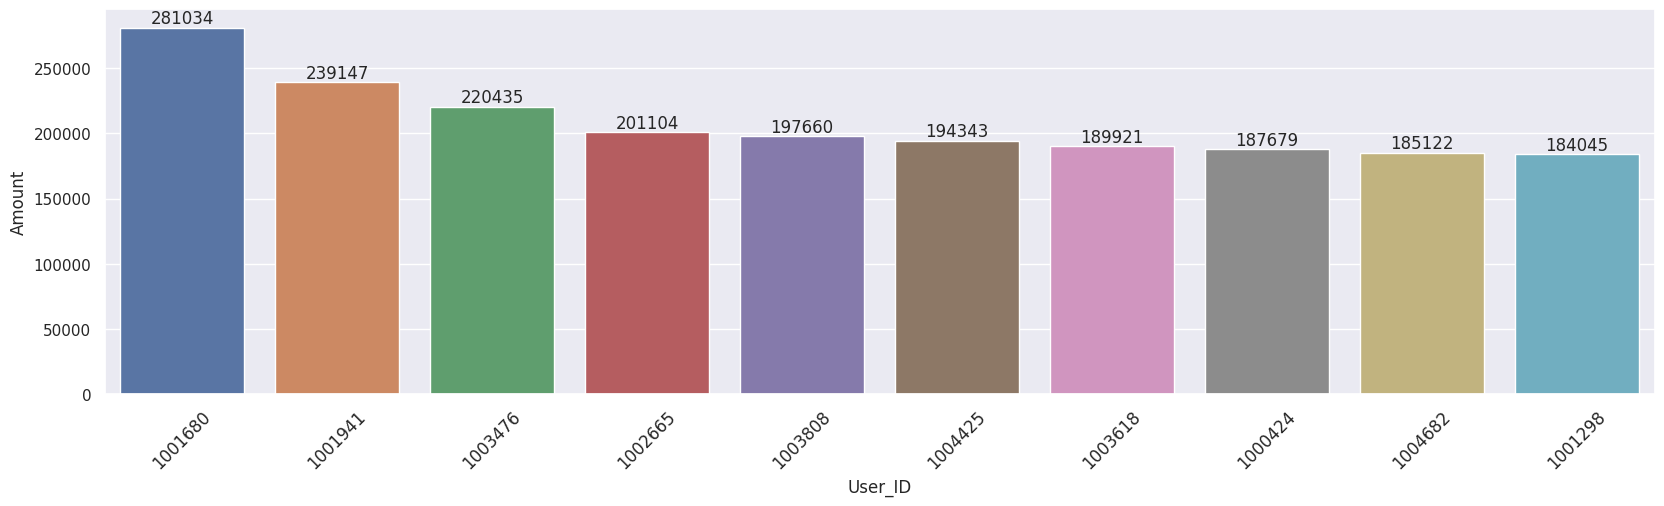

<Figure size 2000x500 with 0 Axes>

In [35]:
top_customers_sales = df.groupby(['User_ID'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})

ax = sns.barplot(x='User_ID', y='Amount', data=top_customers_sales, order=top_customers_sales['User_ID'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()  
plt.savefig('top_customersID_byamount.png')

***The top 3 user_ID are: 1001680, 1001941, 1003476.***

## Conclusion

***The maximum buyers are the married women between the age group of 26-35 years from the states of UP, Maharashtra and Karnataka, working in the IT, Healthcare and Aviation sectors.***